# OpenVINO™ Inference with InceptionV3 Model
This tutorial demostrates step-by-step instructions to perform inference on a [Tensorflow-Keras model](https://keras.io/api/applications/inceptionv3/) using [Intel® Distribution of OpenVINO™ Toolkit](https://software.intel.com/en-us/openvino-toolkit/choose-download) to :

The steps are:
1. Download [InceptionV3](https://keras.io/api/applications/inceptionv3/) model from Keras Applications and save it in Tensorflow SavedModel format.
1. Use the [OpenVINO Model Optimizer](https://docs.openvinotoolkit.org/latest/openvino_docs_MO_DG_Deep_Learning_Model_Optimizer_DevGuide.html) to convert to OpenVINO Intermediate Representation (IR) format
1. Test the model with sample inference using the [OpenVINO Inference Engine](https://docs.openvinotoolkit.org/latest/openvino_docs_IE_DG_Deep_Learning_Inference_Engine_DevGuide.html)

#### Prerequisites:
1. [Intel® Distribution of OpenVINO™ Toolkit](https://software.intel.com/en-us/openvino-toolkit/choose-download)
1. Tensorflow 
1. Python 3.6+ ([Click Here](https://github.com/openvinotoolkit/openvino_notebooks#%EF%B8%8F-system-requirements) for OpenVINO System requirements)

### Install/Update OpenVINO™ (If OpenVINO is not already installed)

For more info, see [OpenVINO PyPi package](https://pypi.org/project/openvino-dev/)

In [1]:
import os
try:
    from openvino.runtime import Core
except:
    os.system("pip install -U --ignore-installed PyYAML openvino-dev[tensorflow]")

#### Note: Install this specific version of OpenCV if you encounter libGl errors
```
!pip uninstall -y opencv-python
!pip install -U opencv-python-headless==4.2.0.32
```

### Verify OpenVINO™ Installation

In [2]:
!pip show openvino-dev

Name: openvino-dev
Version: 2023.0.0
Summary: OpenVINO(TM) Development Tools
Home-page: https://docs.openvino.ai/latest/index.html
Author: Intel® Corporation
Author-email: openvino_pushbot@intel.com
License: OSI Approved :: Apache Software License
Location: /home/ec2-user/.local/lib/python3.7/site-packages
Requires: addict, defusedxml, jstyleson, networkx, networkx, numpy, opencv-python, opencv-python, openvino, openvino-telemetry, pillow, pyyaml, requests, scipy, texttable, tqdm
Required-by: 


### Import neccessary packages

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
import shutil
import subprocess

2023-06-08 02:13:30.076026: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-08 02:13:30.079251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-08 02:13:30.079265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
#Set log level to ERROR for tensorflow, PIL, IPKernelAPP
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
logging.getLogger('IPKernelApp').setLevel(logging.ERROR)
logging.getLogger('PIL').setLevel(logging.ERROR)


### Download InceptionV3 model and save it in Tensorflow SavedModel format.

In [5]:
print("Downloading the model....")
model = InceptionV3(weights='imagenet')
tf_model_fname = './inceptionv3/'

# Save the model to path specified.
if os.path.isdir(tf_model_fname):
    print(f"{tf_model_fname} exists already. Deleting the folder")
    shutil.rmtree(tf_model_fname)
os.mkdir(tf_model_fname)

# Save the model
print("\nSaving the model in Tensorflow SavedModel Format ...")
model.save(tf_model_fname)
print(f"Model saved at {tf_model_fname}")

output = subprocess.check_output(f"ls -l {tf_model_fname}", shell=True)
print (output.decode('utf-8'))

2023-06-08 02:13:31.409281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-08 02:13:31.409306: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-08 02:13:31.409320: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-10-0-4-2.us-west-2.compute.internal): /proc/driver/nvidia/version does not exist
2023-06-08 02:13:31.409493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


./inceptionv3/ exists already. Deleting the folder

Saving the model in Tensorflow SavedModel Format ...


Model saved at ./inceptionv3/
total 5412
drwxr-xr-x 2 ec2-user ec2-user       6 Jun  8 02:13 assets
-rw-rw-r-- 1 ec2-user ec2-user  642342 Jun  8 02:13 keras_metadata.pb
-rw-rw-r-- 1 ec2-user ec2-user 4895280 Jun  8 02:13 saved_model.pb
drwxr-xr-x 2 ec2-user ec2-user      66 Jun  8 02:13 variables



### Convert Tensorflow SavedModel to OpenVINO™ Intermediate Representation (IR) format
For more details, see [Convert a Model documentation](https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_Deep_Learning_Model_Optimizer_DevGuide.html)

In [6]:
print("\nExporting Tensorflow SavedModel to OpenVINO IR format ...")
from openvino.tools.mo import convert_model
ov_model = convert_model(tf_model_fname)

ov_model_fname = "./inceptionv3/ov/saved_model.xml"

from openvino.runtime import serialize
serialize(ov_model, xml_path=ov_model_fname)
print(f"OpenVINO Model saved at {os.path.dirname(ov_model_fname)}")

output = subprocess.check_output(f"ls -lh {os.path.dirname(ov_model_fname)}", shell=True)
print (output.decode('utf-8'))


Exporting Tensorflow SavedModel to OpenVINO IR format ...
OpenVINO Model saved at ./inceptionv3/ov
total 92M
-rw-rw-r-- 1 ec2-user ec2-user  91M Jun  8 02:13 saved_model.bin
-rw-rw-r-- 1 ec2-user ec2-user 254K Jun  8 02:13 saved_model.xml



## Sample Inference with OpenVINO™ Inference Engine

### Define a input preprocessing function

In [7]:
from PIL import Image
import numpy as np

def pre_process_image(imagePath, img_height=299):
    # Model input format
    n, h, w, c = [1, img_height, img_height, 3]
    image = Image.open(imagePath)
    image = image.resize((h, w), resample=Image.BILINEAR)
   
    # Normalize to keep data between 0 - 1
    image = np.array(image) / 255.0

    # image = image.transpose((2, 0, 1))     # Change data layout from HWC to CHW
    input_image = image.reshape((n, h, w, c))

    return input_image

### Download, Load and pre-process the input image

In [8]:
inp_img_url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
inp_file_name = 'dog-image.jpg'

#Download the image from wikipedia
output = subprocess.check_output(f"curl {inp_img_url} --output {inp_file_name}", shell=True)

#Pre-process the image and get it ready for inference.
input_image = pre_process_image(inp_file_name)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  207k  100  207k    0     0  1145k      0 --:--:-- --:--:-- --:--:-- 1147k


### Load the OpenVINO™ IR network and Run the inference

In [9]:
from openvino.runtime import Layout, set_batch
model_xml = ov_model_fname

# Load network to the plugin
ov_core = Core()
model = ov_core.read_model(model=model_xml)
model.get_parameters()[0].set_layout(Layout("N..."))
set_batch(model, 1)
compiled_model = ov_core.compile_model(model, device_name="CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# Run the Inference on the Input image...
res = compiled_model(inputs={input_layer: input_image})
res = res[output_layer]

### Process and Display the result

In [10]:
from tensorflow.keras.applications.inception_v3 import decode_predictions
# Predicted class index.
idx = np.argsort(res[0])[-1]
top3_pred = decode_predictions(res, top=3)[0]

print('Top 3 Predictions:')
for pred in top3_pred:
    print(f"{pred[1]}: {pred[2]*100 :.2f} %")

Top 3 Predictions:
golden_retriever: 57.36 %
Great_Pyrenees: 7.06 %
kuvasz: 5.84 %


Prediction: golden_retriever: 57.36 %


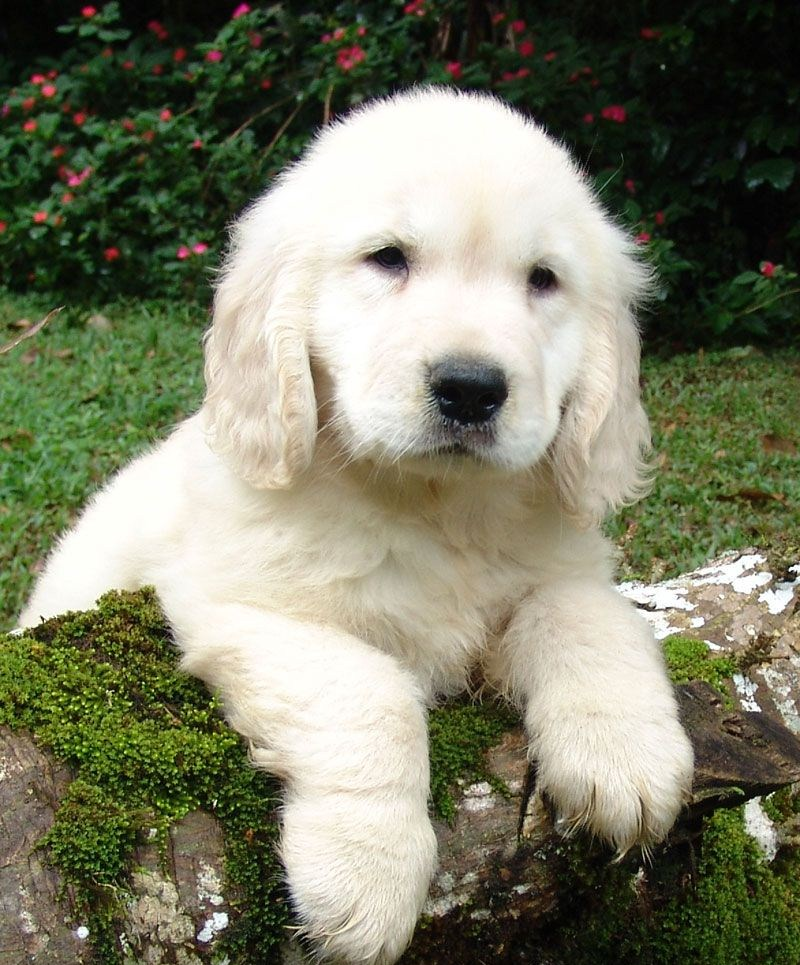

In [11]:
from IPython.display import display 
pred_class = top3_pred[0][1]
pred_prob = top3_pred[0][2]
print(f"Prediction: {pred_class}: {pred_prob*100:.2f} %")
display(Image.open(inp_file_name))

### Test OpenVINO™ Benchmark App
[Click here](https://docs.openvinotoolkit.org/latest/openvino_inference_engine_tools_benchmark_tool_README.html) for more info about Benchmark APP

In [12]:
time_to_run_benchmark = 10
benchmark_cmd = f"benchmark_app -shape [1,299,299,3]  -m {ov_model_fname} --time {time_to_run_benchmark}"

In [13]:
print (f"Running OpenVINO Benchmark App for {time_to_run_benchmark} seconds....")
output = subprocess.check_output(benchmark_cmd, shell=True)
print (output.decode('utf-8'))

Running OpenVINO Benchmark App for 10 seconds....
[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2023.0.0-10926-b4452d56304-releases/2023/0
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2023.0.0-10926-b4452d56304-releases/2023/0
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 13.11 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     input_1 (node: input_1) : f32 / [...] / [?,299,299,3]
[ INFO ] Model outputs:
[ INFO ]     predictions (node: inception_v3/predictions/Softmax) : f32 / [...] / [?,1000]
[Step 5/11] Resizing model to ma